In [1]:
import pandas as pd
df = pd.read_csv("breast-cancer.data.csv")
df.head()
df.describe

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


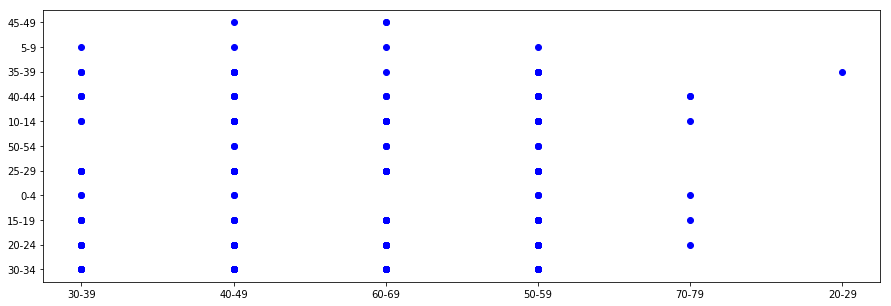

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['age'],df['tumor-size'],'bo')
plt.show()

In [4]:
y = pd.get_dummies(df)
y.head()

,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [5]:
x = df['Class']
x.head()

0    no-recurrence-events
1    no-recurrence-events
2    no-recurrence-events
3    no-recurrence-events
4    no-recurrence-events
Name: Class, dtype: object

In [6]:
import numpy as np
x=pd.Series(np.where(df.Class.values == 'no-recurrence-events', 1, 0),
          df.index)
x.head()
x.shape

(286,)

In [7]:
y.drop(['Class_no-recurrence-events', 'Class_recurrence-events'], axis = 1) 
y.isnull().sum() 
x.isnull().sum()

0

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y, x, random_state=1)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred = knn.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[19,  2],
       [ 0, 51]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9722222222222222
